In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [4]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Define the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    BatchNormalization(),  # Batch normalization layer
    Dropout(0.2),          # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [8]:
# Train the model
history = model.fit(x_train_flat, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
375/375 [==============================] - 12s 27ms/step - loss: 0.2907 - accuracy: 0.9122 - val_loss: 0.1261 - val_accuracy: 0.9618
Epoch 2/50
375/375 [==============================] - 8s 21ms/step - loss: 0.1282 - accuracy: 0.9614 - val_loss: 0.1036 - val_accuracy: 0.9683
Epoch 3/50
375/375 [==============================] - 9s 24ms/step - loss: 0.0988 - accuracy: 0.9692 - val_loss: 0.0838 - val_accuracy: 0.9744
Epoch 4/50
375/375 [==============================] - 7s 19ms/step - loss: 0.0796 - accuracy: 0.9749 - val_loss: 0.0943 - val_accuracy: 0.9719
Epoch 5/50
375/375 [==============================] - 9s 23ms/step - loss: 0.0682 - accuracy: 0.9781 - val_loss: 0.0857 - val_accuracy: 0.9738
Epoch 6/50
375/375 [==============================] - 7s 17ms/step - loss: 0.0611 - accuracy: 0.9803 - val_loss: 0.0788 - val_accuracy: 0.9782
Epoch 7/50
375/375 [==============================] - 8s 21ms/step - loss: 0.0521 - accuracy: 0.9828 - val_loss: 0.0768 - val_accuracy: 0.977

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9827
Test Accuracy: 0.982699990272522


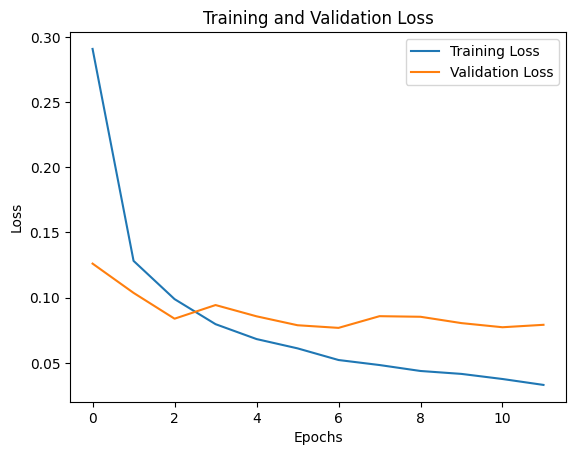

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

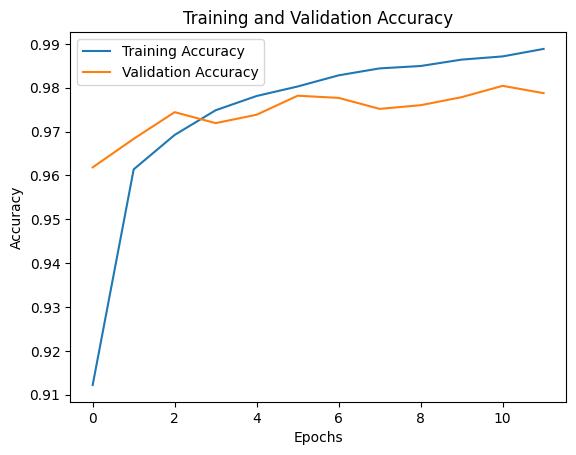

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 4ms/step


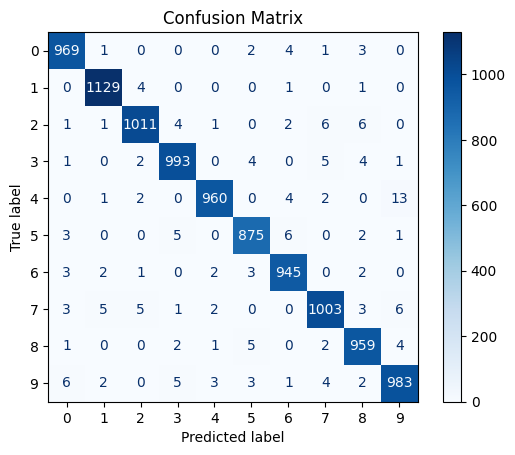

In [12]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test_flat), axis=-1)
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()